In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import sys

In [2]:
# # Load the Wine Dataset
df_wine = pd.read_csv("data/winemag-data-130k-v2.csv", encoding = 'utf8', index_col=0)
df_wine = df_wine.reset_index()

In [3]:
df_wine.head(3)

,index,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm


In [4]:
#df_wine = df_wine.drop('points', 1)

In [5]:
print(df_wine.dtypes)

index                      int64
country                   object
description               object
designation               object
points                     int64
price                    float64
province                  object
region_1                  object
region_2                  object
taster_name               object
taster_twitter_handle     object
title                     object
variety                   object
winery                    object
dtype: object


In [6]:
# Finding the number of rows with NULL values
df_wine.isnull().sum()

index                        0
country                     63
description                  0
designation              37465
points                       0
price                     8996
province                    63
region_1                 21247
region_2                 79460
taster_name              26244
taster_twitter_handle    31213
title                        0
variety                      1
winery                       0
dtype: int64

In [7]:
# DROP region_2 column since most of the records NULL and we have region_1
df_wine = df_wine.drop('region_2', 1)

In [8]:
# DROP rows with NULL values
df_wine=df_wine.dropna()
df_wine.shape

(52106, 13)

In [9]:
df_wine['points'].describe()

count    52106.000000
mean        89.031474
std          2.963115
min         80.000000
25%         87.000000
50%         89.000000
75%         91.000000
max        100.000000
Name: points, dtype: float64

# Convert categorical COUNTRY column to Numeric

In [10]:
df_wine['country'].unique()

array(['US', 'Spain', 'Italy', 'France', 'Argentina', 'Australia',
       'Canada'], dtype=object)

In [11]:
df_country = df_wine.country.str.get_dummies() # get the pivot of the country attribte
df_country.columns = ['from_' + col for col in df_country.columns] # naming the columns
df_wine = pd.concat([df_wine, df_country], axis=1) # combine main dataframe with country matrix dataframe
df_wine = df_wine.drop('country', axis=1) # drop the country attribute since different attributes per country value
df_wine.head(3)

,index,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery,from_Argentina,from_Australia,from_Canada,from_France,from_Italy,from_Spain,from_US
4,4,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,0,0,0,0,0,0,1
5,5,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem,0,0,0,0,0,1,0
6,6,"Here's a bright, informal red that opens with ...",Belsito,87,16.0,Sicily & Sardinia,Vittoria,Kerin O’Keefe,@kerinokeefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo,0,0,0,0,1,0,0


# Extracting Year from Title

In [12]:
import re

In [13]:
# REGEX: Extract first numbers from Title - FAILED BECAUSE THERE ARE MANY NUMBERS IN TITLES
df = pd.DataFrame(df_wine['title'])
df['year'] = df['title'].str.extract('(\d+)')
df.year.unique()

array(['2012', '2011', '2013', '2010', '2007', '2009', '2015', '2014',
       nan, '2016', '2', '2006', '46', '2008', '1887', '2000', '2002',
       '2001', '1999', '772', '1', '2003', '2005', '2004', '2017', '14',
       '41', '3', '012', '1996', '33', '1492', '1898', '1997', '1998',
       '7200', '7', '12', '66', '5', '9', '6', '42', '1929', '075', '17',
       '1994', '10', '39', '4', '21', '38', '1995', '1988', '1992',
       '1827', '460', '735', '1872', '109', '204', '150', '50', '1877',
       '1875', '30', '1852', '1000', '1868', '15', '16', '360', '29',
       '1882', '51', '1989', '375', '158', '1860', '69', '1947', '13',
       '1991', '1985', '1927', '1904', '1847', '1856', '736', '010',
       '1752', '18401', '100', '24', '1607', '813', '44', '1978', '1919',
       '1986', '013', '09', '1990', '20', '500', '61', '1821', '1993',
       '23', '555', '428', '18', '999', '36', '01', '25', '34', '1945',
       '31', '88', '26', '733'], dtype=object)

In [14]:
# FUNCTION: FIND ALL NUMBERS IN THE TITLE, ADD THEM TO A LIST VARIABLE
def regex(x):
    L = re.findall(r'\d+', str(x))
    L_str = ",".join(str(x) for x in L)
    return str(L_str)

In [15]:
df['title_num_values'] = df['title'].apply(regex)

In [16]:
# FINDING HOW MANY NUMBERS DOES EACH TITLE INCLUDE
df['num_count'] = df.title_num_values.str.count(',') + 1
numeric_values_ct = df.num_count.max()
df.head()

,title,year,title_num_values,num_count
4,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,2012,2012,1
5,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,2011,2011,1
6,Terre di Giurfo 2013 Belsito Frappato (Vittoria),2013,2013,1
9,Jean-Baptiste Adam 2012 Les Natures Pinot Gris...,2012,2012,1
10,Kirkland Signature 2011 Mountain Cuvée Caberne...,2011,2011,1


In [17]:
# FOR ALL THE NUMERIC VALUES IN THE TITLES FIND THEM AND ADD TO A NEW DATA FRAME AS COLUMNS
def regex2(y):
    L = re.findall(r'\d+', str(y))
    X = np.array([L])
    new_L = []
    for x in X:
        a = x.tolist()
        b = []
        for i in range(1, numeric_values_ct + 1):
            if len(a) == numeric_values_ct:
                new_L.append(a)
                break
            else:
                for j in range(0, numeric_values_ct - len(a)):
                     b = a.extend([0])
    return new_L

In [18]:
xx = df['title'].apply(regex2)
new_list1 = []
new_list2 = []
new_list3 = []
new_list4 = []
new_list5 = []
for row in xx:
    new_list1.append(row[0][0])
    new_list2.append(row[0][1])
    new_list3.append(row[0][2])
    new_list4.append(row[0][3])
    new_list5.append(row[0][4])

In [19]:
df.insert(loc=0, column='N5', value= pd.Series(new_list5))
df.insert(loc=0, column='N4', value= pd.Series(new_list4))
df.insert(loc=0, column='N3', value= pd.Series(new_list3))
df.insert(loc=0, column='N2', value= pd.Series(new_list2))
df.insert(loc=0, column='N1', value= pd.Series(new_list1))

In [20]:
# SET 0 FOR ALL THE VALUES WHICH HAS MORE THAN 4 DIGIT
df.loc[df['N1'].astype(str).map(len) != 4 , 'N1'] = 0
df.loc[df['N2'].astype(str).map(len) != 4 , 'N2'] = 0
df.loc[df['N3'].astype(str).map(len) != 4 , 'N3'] = 0
df.loc[df['N4'].astype(str).map(len) != 4 , 'N4'] = 0
df.loc[df['N5'].astype(str).map(len) != 4 , 'N5'] = 0

# SET 0 FOR ALL THE VALUES GREATER THAN CURRENT YEAR
df.loc[df['N1'].astype(int) > 2018 , 'N1'] = 0
df.loc[df['N2'].astype(int) > 2018 , 'N2'] = 0
df.loc[df['N3'].astype(int) > 2018 , 'N3'] = 0
df.loc[df['N4'].astype(int) > 2018 , 'N4'] = 0
df.loc[df['N5'].astype(int) > 2018 , 'N5'] = 0

In [21]:
df['year_of_wine'] = df[['N5','N4','N3','N2','N1']].astype(int).max(axis=1)

In [22]:
# DELETE ALL THE YEARS BEFORE 1900 
df = df[['title', 'year_of_wine']]
df.loc[df['year_of_wine']  < 1900 , 'year_of_wine'] = 0
df.year_of_wine.unique()

array([2011, 2010, 2009, 2013, 2015,    0, 2012, 2014, 2006, 2007, 2016,
       2008, 2003, 2004, 2005, 2017, 1999, 1997, 1998, 2002, 2001, 2000,
       1996, 1995, 1989, 1904, 1992, 1978, 1919, 1985, 1993])

In [23]:
# CONCAT THE YEAR COLUMN TO MAIN DATAFRAME
try:
    if 'year_of_wine' not in df_wine:
        df_wine = pd.concat([df_wine, df.year_of_wine], axis=1)
except (RuntimeError, TypeError, NameError):
    print("Error: concating year to main dataframe")

In [24]:
df_wine.head(3)

,index,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery,from_Argentina,from_Australia,from_Canada,from_France,from_Italy,from_Spain,from_US,year_of_wine
4,4,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,0,0,0,0,0,0,1,2011
5,5,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem,0,0,0,0,0,1,0,2010
6,6,"Here's a bright, informal red that opens with ...",Belsito,87,16.0,Sicily & Sardinia,Vittoria,Kerin O’Keefe,@kerinokeefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo,0,0,0,0,1,0,0,2011


# Regression Model

In [25]:
print(df_wine.dtypes)

index                      int64
description               object
designation               object
points                     int64
price                    float64
province                  object
region_1                  object
taster_name               object
taster_twitter_handle     object
title                     object
variety                   object
winery                    object
from_Argentina             int64
from_Australia             int64
from_Canada                int64
from_France                int64
from_Italy                 int64
from_Spain                 int64
from_US                    int64
year_of_wine               int64
dtype: object


In [26]:
# DEFINE X and Y VARIABLES
df_X = df_wine[['price','year_of_wine','from_Argentina', 'from_Canada', 'from_France', 'from_Italy', 'from_Spain', 'from_US']]
df_Y = df_wine[['points']]

In [27]:
# devide the dataframe for training and testing 
X_train, X_test, y_train, y_test = train_test_split(df_X, df_Y, test_size=0.20)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(41684, 8) (41684, 1)
(10422, 8) (10422, 1)


In [28]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
y_predictions = lm.predict(X_test)

In [29]:
# Cross Validation k-Fold
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

def kFold(m, x, y):
    best_r2 = 0.0
    best_k = 0
    for k in range(3, 11):
        predictions = cross_val_predict(m, x, y, cv=k)
        accuracy = metrics.r2_score(df_Y, predictions)
        if accuracy > best_r2:
            best_k = k
            best_r2 = accuracy
            best_pred = predictions
        print('Fold:', k, 'Accuracy:', accuracy)
    print('Best accuracy(r2) is', best_r2, 'with', best_k, 'folds')
    return best_pred

In [30]:
best_pred = kFold(model, df_X, df_Y)

Fold: 3 Accuracy: 0.24219344040833202
Fold: 4 Accuracy: 0.24361398422553082
Fold: 5 Accuracy: 0.24372552655038882
Fold: 6 Accuracy: 0.2438014819790224
Fold: 7 Accuracy: 0.2433141775083889
Fold: 8 Accuracy: 0.24320059940705174
Fold: 9 Accuracy: 0.2430307208786494
Fold: 10 Accuracy: 0.24348424630395848
Best accuracy(r2) is 0.2438014819790224 with 6 folds


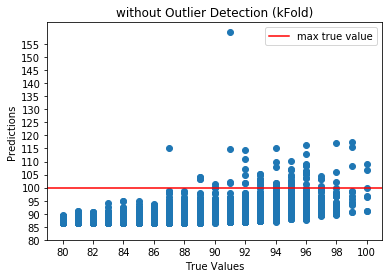

In [48]:
# Plot the results
plt.scatter(df_Y, best_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')

#Axes
max_x_axis = int(max(y_predictions))
min_x_axis = int(min(y_predictions))
max_y_axis = int(max(y_test.points))
min_y_axis = int(min(y_test.points))

plt.yticks(np.arange(80, 150  + 10, 5))
plt.xticks(np.arange(80 ,100 + 2, 2))

plt.axhline(max_y_axis, label='max true value', color="red")
plt.title('without Outlier Detection (kFold)')
plt.legend()

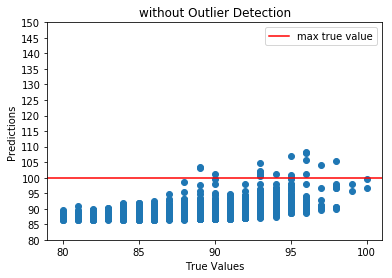

In [46]:
# Plot the results
plt.scatter(y_test, y_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
max_y_predictions = int(max(y_predictions))
min_y_predictions = int(min(y_predictions))
max_y_true = int(max(y_test.points))
min_y_true = int(min(y_test.points))
plt.yticks(np.arange(80, 150 + 2, 5)) # case when ekleyip max true daha buyukse onu maks a al
plt.xticks(np.arange(80, 100 + 2, 5))
plt.axhline(max_y_true,label='max true value', color="red")
plt.title('without Outlier Detection')
plt.legend()
#plt.yticks(np.arange(80, 130, 10))
#plt.xticks(np.arange(80, 101, 5))
#plt.axis([80, 100, 80, 120])

In [33]:
# Accuracy score
print ('Accuracy:', model.score(X_test, y_test))
# Root mean squared error (RMSE)
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_predictions)))
# Mean absolute error (MAE)
print('MAE:', metrics.mean_absolute_error(y_test, y_predictions))

Accuracy: 0.2499597193718589
RMSE: 2.5588463673447355
MAE: 2.0622141794903723


In [34]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lm, my_train_dataset_X,  lm.predict(my_test_dataset_X), cv=10)
print("scores = " + str(scores))

NameError: name 'my_train_dataset_X' is not defined